In [68]:
import requests
# url = 'https://www.google.com/search'
# params =      {'q': '박보영','ie': 'UTF-8'} # 쿼리 박보영 'q=박보영' 써도 문제없다.
                   # &rlz=1C1NHXL_koKR844KR844&oq=%EB%B0%95%EB%B3%B4%EC%98%81&aqs=chrome..69i57j0l5.3994j0j8&sourceid=chrome&ie=UTF-8

# resp = requests.get(url,params,headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}) #-> requests-response
# requests.request()

In [79]:
url = 'https://search.naver.com/search.naver'
    
params = {
    'where':'image',
    'query':'박보영'
}


headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}
resp = requests.get(url,params,headers=headers)
dom = BeautifulSoup(resp.text, 'lxml')

In [90]:
import os
path = params['query']
for img in dom.select('img._img'):
    title = img['alt']
    source = img['data-source']
    resp = requests.get(source, headers=headers)
    ext = resp.headers['Content-Type'].split('/')[1]
    with open('{0}/{1}.{2}'.format(path,title,ext),'wb') as fp:
              fp.write(resp.content)

FileNotFoundError: [Errno 2] No such file or directory: '박보영/[인터뷰①] 박보영 "데뷔 이래 가장 나쁜女..♥ 참 어렵더라" | 포토뉴스.jpeg'

In [72]:
dom.select('img._img')[0]['alt'],
dom.select('img._img')[0]['data-source'],
resp.headers['Content-Type'].split('/')[1]


'jpeg'

In [71]:
resp = requests.get(dom.select('img._img')[0]['data-source'])
resp.headers

{'Date': 'Sat, 11 May 2019 20:52:02 GMT', 'Server': 'Testa/4.8.6', 'P3P': 'CP="ALL CURa ADMa DEVa TAIa OUR BUS IND PHY ONL UNI PUR FIN COM NAV INT DEM CNT STA POL HEA PRE LOC OTC"', 'Accept-Ranges': 'bytes', 'Last-Modified': 'Sat, 11 May 2019 20:52:02 GMT', 'Content-Length': '50536', 'Expires': 'Mon, 10 Jun 2019 20:52:02 GMT', 'Cache-Control': 'max-age=2592000', 'Content-Type': 'image/jpeg', 'Age': '901766', 'Strict-Transport-Security': 'max-age=31536000'}

In [17]:
# resp.request.headers , resp.headers
# http = tcp-ip => byte
# resp.content.decode()
# resp.text
# resp.encoding = 'utf-8'
# resp.request.url

# CSS => id,class,attribute
# ID => #cst (1개)
# CLASS => .b.g.r, .b, .g
# [key=value]
# div[id='cst'],[class*='g']
# <div id = 'cst' class='b green globe r'>


# dom.select('.LC20lb') #전체검색
# len(dom.select('.LC20lb'))

# Crawler -> link(a)수집
# 특정 키워드

# Scrapping - >특정페이지, 내가 원하는 데이터 영역만 추출
# 특정단어(미세먼지) 만가져오고 싶다. 할때 사용


# for _ in dom.select('h3.LC20lb'):
#         print(_.text)

# for _ in dom.select('.r > a'):    
#     print(_['href'],_.select_one('h3').text)
    
# 멀티미디어(pdf,png,jpeg,mp3,mp4)

https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81 박보영 - 위키백과, 우리 모두의 백과사전
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D 박보영의 작품 목록 - 위키백과, 우리 모두의 백과사전
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81 박보영 - 나무위키
https://www.youtube.com/watch?v=KK0dddmzhHA 김사랑이 죽었는데 박보영의 몸으로 부활하는 드라마 - YouTube
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81 #박보영 hashtag on Twitter
https://www.msn.com/ko-kr/entertainment/news/%EB%B0%95%EB%B3%B4%EC%98%81-tvn-%EB%93%9C%EB%9D%BC%EB%A7%88-%EC%96%B4%EB%B9%84%EC%8A%A4-%EC%97%AC%EC%A3%BC%EC%9D%B8%EA%B3%B5/ar-BBLZzVh 박보영, tvN 드라마 '어비스' 여주인공 - MSN.com
https://news.joins.com/article/22895953 박보영은 오래 지켜본다. 연애도, 연기 변신도 - 중앙일보 - 조인스
https://www.mk.co.kr/star/broadcasting-service/view/2019/05/335761/ [종합] '어비스' 박보영X안효섭, 살인 사건 공범 존재 알았다 '권수현 ...


In [59]:
from bs4 import BeautifulSoup
dom=BeautifulSoup(resp.content, 'lxml')

In [60]:
import base64
img = dom.select('img.rg_ic rg_i')[0]['src'].split(',')
content = base64.decodebytes(img[1].encode('utf-8'))

IndexError: list index out of range

<div id="cst"><style>.y,.yp,.yf,.yi,.yl,.ye{}.z1asCe{display:inline-block;fill:currentColor;height:24px;line-height:24px;position:relative;width:24px}.z1asCe svg{display:block;height:100%;width:100%}.s2er{}.s2ml{}.s2ra{}.spch{}.spchc{}.spch-dlg{background:transparent;border:none}.spch{background:#fff;height:100%;left:0;opacity:0;overflow:hidden;position:fixed;text-align:left;top:0;visibility:hidden;width:100%;z-index:10000;transition:visibility 0s linear 0.218s,background-color 0.218s}.close-button{background:none;border:none;color:#777;cursor:pointer;font-size:26px;right:0;height:11px;line-height:15px;margin:15px;opacity:.6;padding:0;position:absolute;top:0;width:15px;z-index:10}.close-button:hover{opacity:.8}.close-button:active{opacity:1}.spchc{display:block;height:42px;position:absolute;pointer-events:none}.inner-container{height:100%;opacity:.1;pointer-events:none;width:100%;transition:opacity .318s ease-in}.s2ml .inner-container,.s2ra .inner-container,.s2er .inner-container{opaci
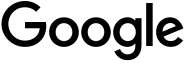

In [28]:
dom.div

In [39]:
# Dom => BS4
# !pip install bs4

  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>박보영 - Google 검색</title><script nonce="mnrxj+gUUTaH+0+whAIheQ==">(function(){window.google={kEI:\'IPDkXOC8HcepoATtmK6gAw\',kEXPI:\'0,201960,1151787,57,1957,1019,1404,698,527,731,223,1575,1258,823,1071,57,320,97,110,1017,166,9,431,128,615,2332255,144,329376,1294,7105,180,3382,1716,1604,2044,314,892,634,1770,1137,4795,1334,3650,314,744,1744,328,5033,10931,279,1191,14056,864,7052,2445,2646,23,770,845,4693,3536,4481,2196,364,3319,4277,1228,2442,260,1259,1800,512,1536,15,560,835,284,2,1306,2431,1362,284,4039,4967,774,152,2104,4738,1151,2,1965,2595,3601,669,1050,1497,311,1396,82,7,491,79,541,29,1395,8909,694,594,2,2919,2,1086,796,101,1119,38,623,297,746,7,120,1217,1364,346,1,848,416,2736,1828,26,1498,342,2562,2,4,2,670,44,650,448,12,866,12,5,7,2148,348,162,12
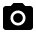
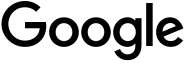
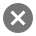
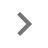
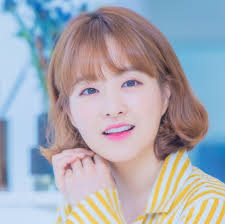
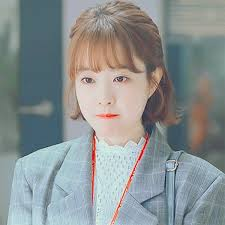
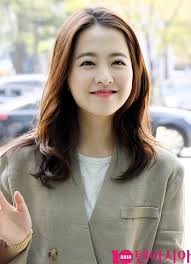
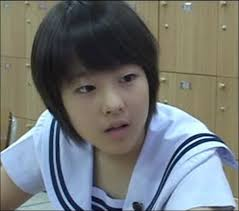
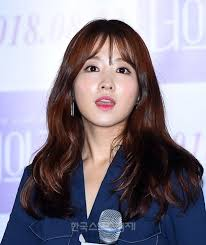

In [29]:
resp.text

In [6]:
resp.status_code

200

In [81]:
!pip install selenium

In [89]:
from selenium import webdriver
driver = webdriver.Chrome('C:\\Users\\USER\\Downloads\\chromedriver_win32\\chromedriver')

In [93]:
driver.get('https://nid.naver.com/nidlogin.login?url=http%3A%2F%2Fmail.naver.com%2F')

In [98]:
import json
with open('../account.json',encoding='utf-8') as fp:
    account = json.load(fp)
account['id']    
%%writefile account.json
{
    'id' : '',
    'pw' : ''
    
}

FileNotFoundError: [Errno 2] No such file or directory: '../account.json'